## Project: Building a Credit Approval Model using Prediction models and Neural Networks

The credit card approval data set is available here: https://archive.ics.uci.edu/ml/datasets/Credit+Approval
Downloaded it, prepared it for analysis and building models

### Importing libraries that will be required

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.linear_model import LogisticRegression

from sklearn import linear_model 

from matplotlib.pyplot import figure

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score
import statsmodels.api as sm

from sklearn.cluster import KMeans, DBSCAN 
from sklearn.metrics import silhouette_score 

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings ("ignore")


# Part1: Performing Exploratory Data Analysis

## Laading the data set in Jupitor

In [2]:
crx = pd.read_csv("crx.data", sep = ",", header = None)
crx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Renaming the columns (Attributes) as it was indicated in data set as A1, A2, ..... A16 where A16 is the class Attribute

In [3]:
crx_new = crx.rename(columns = {0: 'A1', 1: 'A2', 2: 'A3', 3: 'A4', 4: 'A5', 5: 'A6', 6: 'A7', 7: 'A8', 8: 'A9', 
                                9: 'A10', 10: 'A11', 11: 'A12', 12: 'A13', 13: 'A14', 14: 'A15', 15: 'A16_Target'}, inplace = False)

crx_new

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16_Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Checking information of the data frame

In [4]:
crx_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A1          690 non-null    object 
 1   A2          690 non-null    object 
 2   A3          690 non-null    float64
 3   A4          690 non-null    object 
 4   A5          690 non-null    object 
 5   A6          690 non-null    object 
 6   A7          690 non-null    object 
 7   A8          690 non-null    float64
 8   A9          690 non-null    object 
 9   A10         690 non-null    object 
 10  A11         690 non-null    int64  
 11  A12         690 non-null    object 
 12  A13         690 non-null    object 
 13  A14         690 non-null    object 
 14  A15         690 non-null    int64  
 15  A16_Target  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Checking the shape of the data frame

In [5]:
crx_new.shape

(690, 16)

## See the first 10 rows of data frame

In [6]:
crx_new.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16_Target
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


## See the last 10 rows of the data frame

In [7]:
crx_new.tail(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16_Target
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,00400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,00000,0,-


## Saving the data frame as csv

In this case, we will be able to look into the whole data set and see if there are some characters

In [8]:
crx_new.to_csv("Credit Approval.csv")

As suggested, in the dataset instead of using NaN values, there are ?. So we have to replace those ? by normal NaN values

## replacing ? by NaN for better analysis

In [9]:
crx_new1 = crx_new.replace('?', np.NaN)
crx_new1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16_Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


Column A14 looks like account number or card number. Therefore, we should drop it since it has no impact on the approval

## Dropping A14 column

In [10]:
crx_final = crx_new1.drop(['A14'], axis = 1)
crx_final

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15,A16_Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,-


## Now checking the information on this new data frame

In [11]:
crx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A1          678 non-null    object 
 1   A2          678 non-null    object 
 2   A3          690 non-null    float64
 3   A4          684 non-null    object 
 4   A5          684 non-null    object 
 5   A6          681 non-null    object 
 6   A7          681 non-null    object 
 7   A8          690 non-null    float64
 8   A9          690 non-null    object 
 9   A10         690 non-null    object 
 10  A11         690 non-null    int64  
 11  A12         690 non-null    object 
 12  A13         690 non-null    object 
 13  A15         690 non-null    int64  
 14  A16_Target  690 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 81.0+ KB


Therefore, there are NaN values in columns A1,A2,A4,A5,A6 and A7

## Now, let's see the number cards that were and were not approved 

In [12]:
Approved_Cards = crx_final[crx_final['A16_Target'] == '+']
Not_Approved_Cards = crx_final[crx_final['A16_Target'] == '-']

## Print number of customers with credit cards approved or not approved

In [13]:
print(f'customers with their credit approved are: {len(Approved_Cards)}')
print(f'customers with their credit not approved are: {len(Not_Approved_Cards)}')  

customers with their credit approved are: 307
customers with their credit not approved are: 383


## Note that there are NaN values in the dataset, Lets fill them for further analysis

For columns with numerical values/data, we fill the NaN values using linear interpolation while for the columns with categorical data, we fill the NaN values by the mode i.e the most repeated word in the column

## Extracting Numerical data and Categorical data Columns from the data frame

Starting for Numerical Data and Checking their information

In [14]:
Numerical_data_columns = crx_final[['A2','A3','A8','A11','A15']]
Numerical_data_columns

,A2,A3,A8,A11,A15
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0
...,...,...,...,...,...
685,21.08,10.085,1.25,0,0
686,22.67,0.750,2.00,2,394
687,25.25,13.500,2.00,1,1
688,17.92,0.205,0.04,0,750


In [15]:
Numerical_data_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      678 non-null    object 
 1   A3      690 non-null    float64
 2   A8      690 non-null    float64
 3   A11     690 non-null    int64  
 4   A15     690 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 27.1+ KB


From the information above, we can see that for numerical data columns, only A2 has NaN values and its type is not float i.e it should be converted into float type for further analysis.

Then Extracting Categorical data and check its information

In [16]:
Categorical_data_columns = crx_final[['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16_Target']]
Categorical_data_columns

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16_Target
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+
...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,f,g,-
686,a,u,g,c,v,f,t,t,g,-
687,a,y,p,ff,ff,f,t,t,g,-
688,b,u,g,aa,v,f,f,f,g,-


In [17]:
Categorical_data_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          678 non-null    object
 1   A4          684 non-null    object
 2   A5          684 non-null    object
 3   A6          681 non-null    object
 4   A7          681 non-null    object
 5   A9          690 non-null    object
 6   A10         690 non-null    object
 7   A12         690 non-null    object
 8   A13         690 non-null    object
 9   A16_Target  690 non-null    object
dtypes: object(10)
memory usage: 54.0+ KB


Therefore, from the information above, for categorical data columns, there 5 columns (A1,A4,A5,A6 and A7) with NaN values

# Filling NaN Values

### Filling NaN values in A2 column
#### First change its type into float

In [18]:
Numerical_data_columns[['A2']] = Numerical_data_columns[['A2']].astype('float')

##### Then fill NaN in A2

In [19]:
Numerical_data_columns[['A2']] = Numerical_data_columns[['A2']].interpolate(method='linear', limit_direction='forward')
Numerical_data_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      690 non-null    float64
 1   A3      690 non-null    float64
 2   A8      690 non-null    float64
 3   A11     690 non-null    int64  
 4   A15     690 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 27.1 KB


Therefore, all NaN values have been filled for the Numerical data columns

### Filling NaN values in A1 column

In [20]:
mode1 = Categorical_data_columns['A1'].mode().iloc[0]

Categorical_data_columns['A1'].fillna(mode1, inplace = True)

### Filling NaN values in A4 column

In [21]:
mode4 = Categorical_data_columns['A4'].mode().iloc[0]

Categorical_data_columns['A4'].fillna(mode1, inplace = True)

### Filling NaN values in A5 column

In [22]:
mode5 = Categorical_data_columns['A5'].mode().iloc[0]

Categorical_data_columns['A5'].fillna(mode1, inplace = True)

### Filling NaN values in A6 column

In [23]:
mode6 = Categorical_data_columns['A6'].mode().iloc[0]

Categorical_data_columns['A6'].fillna(mode1, inplace = True)

### Filling NaN values in A7 column

In [24]:
mode7 = Categorical_data_columns['A7'].mode().iloc[0]

Categorical_data_columns['A7'].fillna(mode1, inplace = True)

## Checking if all NaN values have been filled in Categorical data

In [25]:
Categorical_data_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          690 non-null    object
 1   A4          690 non-null    object
 2   A5          690 non-null    object
 3   A6          690 non-null    object
 4   A7          690 non-null    object
 5   A9          690 non-null    object
 6   A10         690 non-null    object
 7   A12         690 non-null    object
 8   A13         690 non-null    object
 9   A16_Target  690 non-null    object
dtypes: object(10)
memory usage: 54.0+ KB


From this information above, all NaN values of categorical data have been handled

## After handling all NaN values, let's convert all categorical data into numerical data by using OneHot encoding

In [26]:
Categorical_data_encoded = pd.get_dummies(data = Categorical_data_columns, 
                                          prefix=['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16'],drop_first=True)
Categorical_data_encoded

,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_b,A6_c,A6_cc,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,1,1,0,0,0
4,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
686,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
687,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
688,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Now that all the categorical data are converted to numerical data, let join this data frame to the numerical data dataframe

## Joining Numerical_data_columns and Categorical_data_encoded

In [27]:
crx_final_df = Numerical_data_columns.join(Categorical_data_encoded)
crx_final_df

,A2,A3,A8,A11,A15,A1_b,A4_l,A4_u,A4_y,A5_g,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,30.83,0.000,1.25,1,0,1,0,1,0,1,...,0,0,1,0,1,1,0,0,0,0
1,58.67,4.460,3.04,6,560,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
2,24.50,0.500,1.50,0,824,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,3.75,5,3,1,0,1,0,1,...,0,0,1,0,1,1,1,0,0,0
4,20.17,5.625,1.71,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,22.67,0.750,2.00,2,394,0,0,1,0,1,...,0,0,1,0,0,1,1,0,0,1
687,25.25,13.500,2.00,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,17.92,0.205,0.04,0,750,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


#### Renaming the class attribute

In [28]:
crx_final_df.rename(columns = {'A16_-':'Target'}, inplace = True)
crx_final_df

,A2,A3,A8,A11,A15,A1_b,A4_l,A4_u,A4_y,A5_g,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,Target
0,30.83,0.000,1.25,1,0,1,0,1,0,1,...,0,0,1,0,1,1,0,0,0,0
1,58.67,4.460,3.04,6,560,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
2,24.50,0.500,1.50,0,824,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,3.75,5,3,1,0,1,0,1,...,0,0,1,0,1,1,1,0,0,0
4,20.17,5.625,1.71,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,22.67,0.750,2.00,2,394,0,0,1,0,1,...,0,0,1,0,0,1,1,0,0,1
687,25.25,13.500,2.00,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,17.92,0.205,0.04,0,750,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


This is the final data frame that we are going to use in the rest of the project

## let see the relationship between variables and the target output using correlation

In [29]:
crx_correlation = crx_final_df.corr()
crx_correlation

,A2,A3,A8,A11,A15,A1_b,A4_l,A4_u,A4_y,A5_g,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,Target
A2,1.000000,0.201528,0.398715,0.185432,0.016522,0.039372,-0.062342,0.092642,-0.093065,0.092642,...,-0.054294,0.005868,-0.219670,0.241541,0.208797,0.082910,0.053673,0.013382,-0.020535,-0.165103
A3,0.201528,1.000000,0.298902,0.271207,0.123121,-0.041746,0.069678,0.093017,-0.083781,0.093017,...,-0.002532,0.074880,-0.095540,0.203351,0.244317,0.174846,-0.013023,-0.037842,-0.116404,-0.206294
A8,0.398715,0.298902,1.000000,0.322330,0.051345,0.086544,0.044767,0.082493,-0.075905,0.082493,...,-0.009126,-0.033147,-0.143370,0.194173,0.345689,0.222982,0.138139,-0.065938,-0.007965,-0.322475
A11,0.185432,0.271207,0.322330,1.000000,0.063692,-0.024630,-0.026629,0.122543,-0.111077,0.122543,...,0.005500,-0.026629,-0.049884,0.096952,0.379532,0.571498,0.006944,-0.053491,-0.130871,-0.406410
A15,0.016522,0.123121,0.051345,0.063692,1.000000,-0.002063,0.507261,-0.002880,-0.057273,-0.002880,...,-0.012124,0.507882,-0.050468,0.025743,0.090012,0.077652,0.019201,0.238870,-0.058611,-0.175657
A1_b,0.039372,-0.041746,0.086544,-0.024630,-0.002063,1.000000,-0.022926,-0.065974,0.071250,-0.065974,...,0.050508,-0.022926,0.079309,0.012792,-0.026047,-0.077784,0.051674,0.012792,0.084069,0.028934
A4_l,-0.062342,0.069678,0.044767,-0.026629,0.507261,-0.022926,1.000000,-0.093930,-0.029985,-0.093930,...,-0.004117,0.498547,-0.063134,-0.005839,-0.056478,-0.046594,0.058656,0.245988,0.081747,-0.060221
A4_u,0.092642,0.093017,0.082493,0.122543,-0.002880,-0.065974,-0.093930,1.000000,-0.968889,1.000000,...,-0.000384,-0.031491,0.060377,0.030811,0.164424,0.190721,0.008846,-0.157329,0.013731,-0.169423
A4_y,-0.093065,-0.083781,-0.075905,-0.111077,-0.057273,0.071250,-0.029985,-0.968889,1.000000,-0.968889,...,0.002475,-0.029985,-0.029408,-0.028362,-0.138535,-0.170268,0.002402,-0.060234,-0.018160,0.188964
A5_g,0.092642,0.093017,0.082493,0.122543,-0.002880,-0.065974,-0.093930,1.000000,-0.968889,1.000000,...,-0.000384,-0.031491,0.060377,0.030811,0.164424,0.190721,0.008846,-0.157329,0.013731,-0.169423


## Using heat-map to better visualize the relationship between variables

<AxesSubplot:>

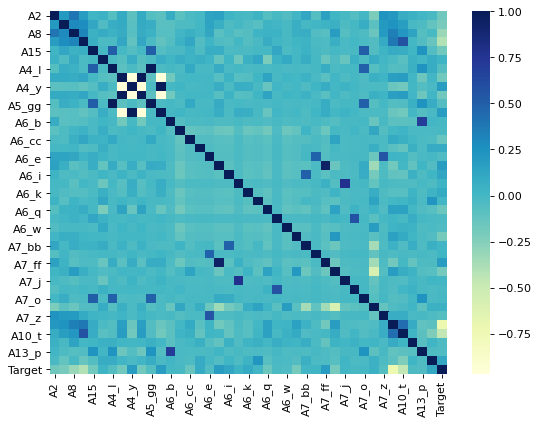

In [30]:
figure(figsize=(8, 6), dpi=80)                 # setting the size of the correlation heat map
sns.heatmap(crx_correlation, cmap="YlGnBu")       # generating the heap map of the correlation matrix

# Part2: Building Models

To build the model, we should have the predictors (independent variables) and the target (dependent variable)

### Retrieving predictors (X) and target (y) from the final data frame

In [31]:
X = crx_final_df.iloc[:,:40]
y = crx_final_df[['Target']]

### spliting the data variables into train and test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling the train and test data

In [33]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

## Building Random Forest Classifier model for prediction

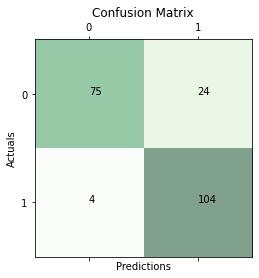

Classification Report:

Precision:0.878
Recall:0.865
f1-score:0.863


In [34]:
# let us then Build Random Forest model

Rf_Classifier = RandomForestClassifier(n_estimators = 80, min_samples_leaf=3,max_leaf_nodes = 80, max_depth=3, n_jobs=-1)
Rf_Classifier.fit(X_train_scaled,y_train)
Rf_prediction = Rf_Classifier.predict(X_test_scaled)

# Now lets use Metrics to calculate the accuracies

Rf_conf_matrix = confusion_matrix(y_test,Rf_prediction)

# Let's plot the confusion matrix

fig, ax = plt.subplots(figsize = (4,4))
ax.matshow(Rf_conf_matrix, cmap = plt.cm.Greens, alpha = 0.5)
for i in range(Rf_conf_matrix.shape[0]):
    for j in range(Rf_conf_matrix.shape[1]):
        ax.text(x = j, y = i, s = Rf_conf_matrix[i, j],)
        
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

## Now let's use Classification Report to generate the accuracies

print("Classification Report:")
Rf_c_report = classification_report(y_test,Rf_prediction,output_dict=True)

Rf_precision = Rf_c_report['weighted avg']['precision']
Rf_recall = Rf_c_report['weighted avg']['recall']
Rf_f1score = Rf_c_report['weighted avg']['f1-score']

print()

print(f"Precision:{Rf_precision:.3f}\nRecall:{Rf_recall:.3f}\nf1-score:{Rf_f1score:.3f}")


Those parameters (Precision, Recall and f1-score) indicates how well the model is accurate to predict the output

## Building the neural network model with evaluation using 10-fold cross validation

In [44]:

# define 10-fold cross validation test harness

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

## Creating the model and fit the model

Neural_model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(120,120), activation='relu', random_state=1, max_iter=200, 
                             alpha=0.0001)

# MLP = MLPClassifier()
Neural_model.fit(X_train_scaled, y_train)
y_pred = Neural_model.predict(X_test_scaled)

fold_scores_recall = cross_val_score(Neural_model, X_train_scaled, y_train, cv = kfold, scoring='recall_weighted')
print(f"Recall:{np.mean(fold_scores_recall):.3f}")

fold_scores_f1 = cross_val_score(Neural_model, X_train_scaled, y_train, cv = kfold, scoring='f1_weighted')
print(f"f1_score:{np.mean(fold_scores_f1):.3f}")


Recall:0.785
f1_score:0.785


## Perform Classification report

In [46]:
Classification_report = classification_report(y_test, y_pred)
print('The Classification report:')
print(Classification_report)

The Classification report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        99
           1       0.82      0.89      0.85       108

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



## Lets use confusion matrix to visualize well the accuracy

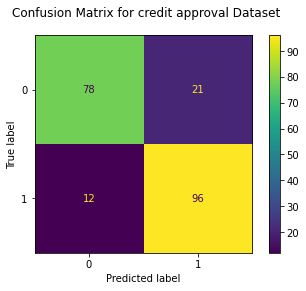

In [45]:
conf_matrix = plot_confusion_matrix(Neural_model, X_test_scaled, y_test)
conf_matrix.figure_.suptitle("Confusion Matrix for credit approval Dataset")
plt.show()

### Tune Hyperparameters with GridSearchCV
### Ref: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

## Building the new model

In [48]:
Neural_model_Tune = MLPClassifier()

model_parameters = {'max_iter':[15,97,24],'hidden_layer_sizes':[(135,52,82),(65,143,39),(15,77,99),(175,125,75)],
              'learning_rate':['constant','adaptive'],'activation':['identity','logistic','tanh','relu'],
              'solver':['sdg','lbfgs','adam']}



## Now lets Initialize GridSearchCV() object and fit it with hyperparameters

In [49]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

model_Classifier = GridSearchCV(Neural_model_Tune, model_parameters, cv = kfold, scoring='accuracy')

model_Classifier.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(135, 52, 82), (65, 143, 39),
                                                (15, 77, 99), (175, 125, 75)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [15, 97, 24],
                         'solver': ['sdg', 'lbfgs', 'adam']},
             scoring='accuracy')

## Now lets get the Best Hyperparameters that gives best estimator on dataset

In [50]:
model_Classifier.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (135, 52, 82),
 'learning_rate': 'adaptive',
 'max_iter': 15,
 'solver': 'adam'}

## Creating the model and fit the model for the best parameters chosen
## Then find recall and f1_score metrics

In [51]:

Neural_model_best_params = MLPClassifier(activation = model_Classifier.best_params_['activation'], 
                                hidden_layer_sizes = model_Classifier.best_params_['hidden_layer_sizes'], 
                                learning_rate = model_Classifier.best_params_['learning_rate'], max_iter = model_Classifier.best_params_['max_iter'],
                               solver = model_Classifier.best_params_['solver'] )

Neural_model_best_params.fit(X_train_scaled, y_train)

y_pred_best = Neural_model_best_params.predict(X_test_scaled)

best_fold_scores_f1 = cross_val_score(Neural_model_best_params, X_train_scaled, y_train, cv = kfold, scoring='f1_weighted')
print(f"f1_score:{np.mean(best_fold_scores_f1):.3f}")

best_fold_scores_Recall = cross_val_score(Neural_model_best_params, X_train_scaled, y_train, cv = kfold, scoring='recall_weighted')
print(f"Recall:{np.mean(best_fold_scores_Recall):.3f}")

f1_score:0.828
Recall:0.818


## Now lets use classification report to find the accuracy

In [53]:
Classification_report = classification_report(y_test, y_pred_best)
print('The Classification report:')
print(Classification_report)

The Classification report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        99
           1       0.87      0.93      0.90       108

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



## Using confusion matrix to visualize the accuracy

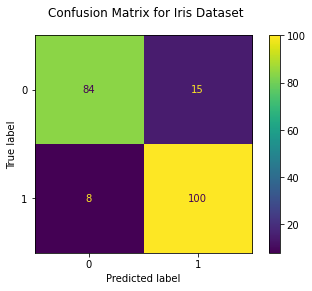

In [59]:
conf_fig = plot_confusion_matrix(Neural_model_best_params, X_test_scaled, y_test)
conf_fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

Summary: by building the neural network model, We can see that the accuracy was 0.84 before Tuning hyperparameters and select the best parameters. After Tuning hyperparameters, the best parameters to be used were selected and a new model was built which improves the accuracy of the model to 0.89. Therefore, by tuning hyperparamters with GridSearchCV, the accuracy of the model increase which improves the performance of the model.